## Import Librabries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

In [3]:
# To predict person is survived or not using various variables

## 2. Data Gathering

In [4]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. EDA

In [6]:
df['PassengerId'].nunique()

891

In [7]:
df['Name'].nunique()

891

In [8]:
df['Ticket'].nunique()

681

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

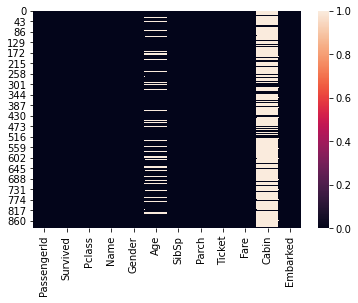

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Drop Columns
column_list = ['PassengerId','Name','Ticket','Cabin']
df.drop(column_list,axis=1, inplace=True)

In [15]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [17]:
df['Gender'].replace({'male':0,'female':1}, inplace=True)

In [18]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df_embarked = pd.get_dummies(df['Embarked'])
df_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [21]:
df = pd.concat([df, df_embarked], axis=1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,0,0,1
887,1,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,1,NaN,1,2,23.4500,S,0,0,1
889,1,1,0,26.0,0,0,30.0000,C,1,0,0


In [22]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [23]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


<AxesSubplot:>

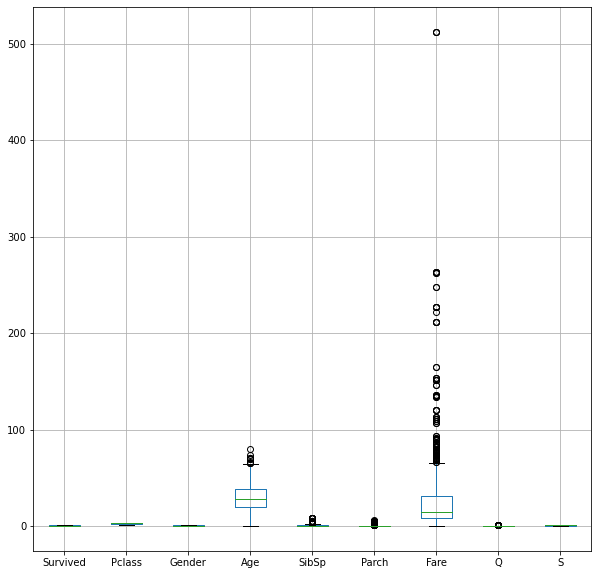

In [24]:
plt.figure(figsize=(10,10))
df.boxplot()

<AxesSubplot:>

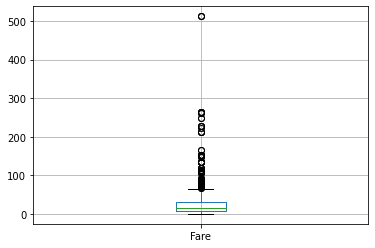

In [25]:
df[['Fare']].boxplot()

In [26]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 3 * iqr
upper_limit

100.2688

In [27]:
df[df['Fare']>upper_limit].shape

(53, 9)

In [28]:
df['Fare'] = np.where(df.Fare > upper_limit, upper_limit, df.Fare)

In [29]:
# df[['Fare']].boxplot()

In [30]:
df['Age'].mean()

29.69911764705882

In [31]:
df['Age'].median()

28.0

In [32]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [33]:
df.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

In [34]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [35]:
df['Survived'].value_counts(normalize=True)

0    0.613917
1    0.386083
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

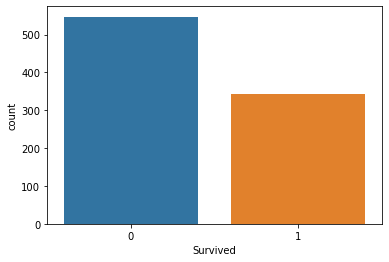

In [36]:
sns.countplot(x= 'Survived', data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

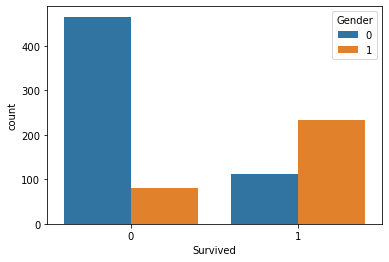

In [37]:
sns.countplot(x= 'Survived', hue = 'Gender' ,data= df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

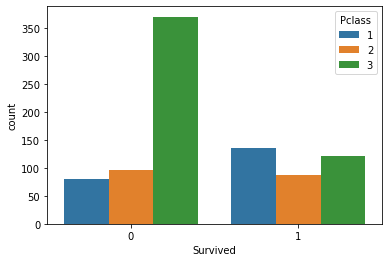

In [38]:
sns.countplot(x= 'Survived', hue = 'Pclass' ,data= df)

In [39]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

## Feature Engineering

In [40]:
x = df.drop('Survived',axis =1)
y = df['Survived']

In [41]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [42]:
x.value_counts()

Pclass  Gender  Age   SibSp  Parch  Fare     Q  S
3       0       28.0  0      0      7.8958   0  1    15
                                    8.0500   0  1    12
                                    7.7500   1  0    10
        1       28.0  0      0      7.7500   1  0     8
2       0       28.0  0      0      0.0000   0  1     6
                                                     ..
                32.5  1      0      30.0708  0  0     1
                33.0  0      0      12.2750  0  1     1
                34.0  1      0      26.0000  0  1     1
                35.0  0      0      10.5000  0  1     1
3       1       63.0  0      0      9.5875   0  1     1
Length: 758, dtype: int64

In [43]:
344/547

0.6288848263254113

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=12)

In [45]:
y_train.value_counts()

0    447
1    265
Name: Survived, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.6 KB


## Model Building

In [47]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

## Evaluation

In [48]:
y_pred = lr_clf.predict(x_test)
y_pred[5:10]

array([0, 1, 1, 0, 0], dtype=int64)

In [49]:
y_test[5:10]

252    0
235    0
823    1
848    0
861    0
Name: Survived, dtype: int64

## Accuracy

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is: \n',cnf_matrix)

Confusion Matrix is: 
 [[88 12]
 [24 55]]


In [51]:
     Actual value
       P    N
P     TP    FP
N     FN    TN

 Actual value
       1    0
1     TP    FP
0     FN    TN

# SKlearn Confusion Matrix
 Predicted value
       0    1
0     TN    FP
1     FN    TP


[[88 12]
 [24 55]]


Precision = TP/(TP+FP)  # FP is used for Precision
Recall = TP/(TP+FN)     # FN is used for Recall

SyntaxError: invalid syntax (<ipython-input-51-0468115b17ff>, line 1)

In [52]:
Precision = 55/(55+12) # Precision for class 1
Precision

0.8208955223880597

In [53]:
Precision = 88/(88+24) # Precision for class 0
Precision

0.7857142857142857

In [54]:
Recall = 55/(55+24) # Recall for class 1
Recall

0.6962025316455697

In [55]:
Recall = 88/(88+12) # Recall for class 0
Recall

0.88

In [56]:
Accuracy =  (55+88)/(55+88+24+12)
Accuracy

0.7988826815642458

In [57]:
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Model is: \n', Accuracy)

Accuracy of Model is: 
 0.7988826815642458


In [58]:
clf_report = classification_report(y_test, y_pred)
print('Classification Report is : \n', clf_report)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.82      0.70      0.75        79

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [59]:
# Probability of class 0 and class 1
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [60]:
y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob

array([[0.78604829, 0.21395171],
       [0.53051451, 0.46948549],
       [0.87874193, 0.12125807],
       [0.59511349, 0.40488651],
       [0.87818312, 0.12181688],
       [0.77039288, 0.22960712],
       [0.44264176, 0.55735824],
       [0.42704178, 0.57295822],
       [0.74594168, 0.25405832],
       [0.78735906, 0.21264094],
       [0.92868839, 0.07131161],
       [0.89633505, 0.10366495],
       [0.85542265, 0.14457735],
       [0.50169888, 0.49830112],
       [0.32368181, 0.67631819],
       [0.83683325, 0.16316675],
       [0.82491512, 0.17508488],
       [0.82950966, 0.17049034],
       [0.8880697 , 0.1119303 ],
       [0.89957371, 0.10042629],
       [0.54651868, 0.45348132],
       [0.73586986, 0.26413014],
       [0.93555532, 0.06444468],
       [0.55016169, 0.44983831],
       [0.46459203, 0.53540797],
       [0.53846038, 0.46153962],
       [0.29636671, 0.70363329],
       [0.40838648, 0.59161352],
       [0.90220585, 0.09779415],
       [0.12707444, 0.87292556],
       [0.

In [ ]:
# probability of belonging to class 0
[0.78604829, 0.21395171], >> Class 0
[0.53051451, 0.46948549],
[0.87874193, 0.12125807],
[0.59511349, 0.40488651],
[0.87818312, 0.12181688],
[0.77039288, 0.22960712],
[0.44264176, 0.55735824]  >> Class 1

In [61]:
y_pred[6:8]

array([1, 1], dtype=int64)

In [62]:
y_pred_prob[:,0]

array([0.78604829, 0.53051451, 0.87874193, 0.59511349, 0.87818312,
       0.77039288, 0.44264176, 0.42704178, 0.74594168, 0.78735906,
       0.92868839, 0.89633505, 0.85542265, 0.50169888, 0.32368181,
       0.83683325, 0.82491512, 0.82950966, 0.8880697 , 0.89957371,
       0.54651868, 0.73586986, 0.93555532, 0.55016169, 0.46459203,
       0.53846038, 0.29636671, 0.40838648, 0.90220585, 0.12707444,
       0.917563  , 0.87763665, 0.32493549, 0.90481378, 0.91516414,
       0.165265  , 0.89124333, 0.86653619, 0.74385058, 0.39806884,
       0.8994748 , 0.7616808 , 0.25051418, 0.56146414, 0.93779993,
       0.91648071, 0.07515254, 0.93440696, 0.87470361, 0.77655012,
       0.71081003, 0.06526392, 0.05446614, 0.50359767, 0.89957371,
       0.89957371, 0.87204828, 0.12051434, 0.50043   , 0.8919394 ,
       0.90860537, 0.40422147, 0.35243369, 0.49331252, 0.86624212,
       0.06232705, 0.24265891, 0.4417665 , 0.88979754, 0.88191102,
       0.90182257, 0.87226589, 0.84150505, 0.47767189, 0.32493

In [63]:
fpr , tpr, thresh = roc_curve(y_test,y_pred_prob[:,1])

## ROC Curve

Text(0, 0.5, 'True Positive Rate')

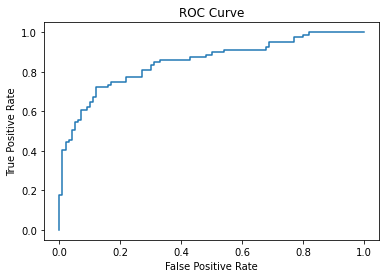

In [64]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [68]:
auc_score = roc_auc_score(y_test,y_pred_prob[:,1])
auc_score

0.8493670886075949

In [ ]:
# Hypothesis Generation:
#     Target feature and values
#     ind var
    

In [ ]:
# v1, v2, v3, v4
# v1>T = 0.82
# v2>T = 0.71
# v3>T = 0.73
# v4>T = 0.79

In [ ]:
# 1    2    3         4 
# 20   M    500     20_M_500
# 46   F    1200    46_F_1200